In [ ]:
# 텍스트 마이닝의 여러 기법들을 활용해서 리뷰 분석을 수행해보자
# - 0. 가상 리뷰 생성
# - 1. 빈도 분석
# - 2. 시각화 
#   - 2-1. 막대 그래프
#   - 2-2. 워드 클라우드 시각화
# - 3. 제품 만족도 수치화
#   - 3-1. 단순 사전 방식
#   - 3-2. 가중치와 복합 의미 방식

# 0. 가상 리뷰 생성

In [1]:
reviews = [
    "속건조가 심한 편인데 이 제품 쓰고 나서 얼굴 당김이 확실히 줄었어요.", "제형이 가볍고 산뜻해서 여름에 쓰기 정말 좋습니다.",
    "바르자마자 흡수되는 느낌이 들고 끈적임이 전혀 없어서 만족해요.", "향이 너무 강해서 민감하신 분들은 호불호가 갈릴 것 같네요.",
    "가성비 최고의 스킨로션입니다. 듬뿍듬뿍 발라도 부담 없어요.", "사용 후 피부 트러블이 올라와서 저랑은 잘 안 맞는 것 같습니다.",
    "보습력이 오래 유지돼서 아침에 바르면 저녁까지 촉촉해요.", "배송 중에 로션 펌프가 깨져서 왔어요. 교환 부탁드립니다.",
    "패키지 디자인이 심플하고 예뻐서 화장대 위에 두기 좋네요.", "유분기가 적당해서 지성 피부인 제가 쓰기에 딱 적당합니다.",
    "물 같은 제형이라 닦토용으로 쓰기에 아주 유용합니다.", "성분이 착해서 그런지 예민한 피부인데도 자극이 없어요.",
    "가격은 좀 비싼 편이지만 품질을 생각하면 재구매 의사 있습니다.", "로션이 약간 겉도는 느낌이 있어서 충분히 두드려줘야 해요.",
    "환절기만 되면 각질이 일어났는데 이 스킨 쓰고 많이 진정됐어요.", "사은품으로 준 샘플이 본품만큼 좋아서 기분이 좋네요.",
    "입구가 좁아서 내용물을 덜어낼 때 조금 불편함이 있습니다.", "남편 선물로 줬는데 끈적이지 않는다고 아주 좋아하며 잘 써요.",
    "피부 결이 정돈되는 느낌이라 화장이 훨씬 잘 먹는 것 같아요.", "대용량 버전도 나왔으면 좋겠어요. 금방 다 써버리네요.",
    "쿨링감이 있어서 홍조 기운 있는 볼에 바르면 진정 효과가 커요.", "배송은 빨랐는데 박스 포장이 너무 허술해서 아쉬웠습니다.",
    "속보습은 잘 채워주는데 겉은 보송하게 마무리돼서 신기해요.", "유통기한이 넉넉한 제품으로 보내주셔서 안심하고 사용합니다.",
    "스킨이랑 로션 같이 쓰니까 시너지 효과가 확실히 있는 것 같아요.", "제 피부에는 수분감이 조금 부족한 것 같아 크림을 덧발라야 해요.",
    "향료가 들어가지 않은 무향이라 오히려 더 깔끔하고 좋았습니다.", "피부 장벽이 튼튼해지는 기분이라 꾸준히 사용해 볼 예정입니다.",
    "펌핑형이라 위생적으로 사용할 수 있는 점이 마음에 듭니다.", "인생 스킨케어 제품 찾았어요! 단종되지 말고 계속 팔아주세요.",
    "오프라인 매장보다 저렴하게 잘 샀습니다. 배송도 만족해요.", "바르고 나면 피부에서 광채가 나서 안색이 좋아 보입니다.",
    "여드름성 피부인데 자극 없이 순하게 잘 스며들어서 다행이에요.", "로션 텍스처가 너무 묽어서 양 조절하기가 약간 힘드네요.",
    "미백 효과는 잘 모르겠지만 수분 충전 하나는 확실합니다.", "겨울에 쓰기엔 조금 가벼운 느낌이라 오일을 섞어 써야겠어요.",
    "친구 추천으로 샀는데 왜 이제야 샀나 싶을 정도로 좋아요.", "성분 분석 어플에서 유해 성분 제로라고 해서 믿고 샀습니다.",
    "한 달 사용해 보니 확실히 피부 톤이 맑아진 게 느껴집니다.", "세안 후 바로 바르면 당김이 즉각적으로 사라져서 필템이에요.",
    "통이 유리라서 좀 무겁긴 하지만 환경을 생각하면 나쁘지 않네요.", "흡수 속도가 광속이에요. 바쁜 아침에 사용하기 최고입니다.",
    "끈적거리는 거 싫어하는 남자분들에게 적극 추천하는 로션입니다.", "원플러스원 행사할 때 쟁여뒀는데 아주 든든합니다.",
    "피부 속까지 수분이 꽉 차는 느낌이라 건조함이 사라졌어요.", "제품 상자에 인쇄된 글씨가 너무 작아서 읽기 힘들어요.",
    "자극적인 성분이 없어서 아이랑 같이 써도 문제없을 것 같아요.", "용기가 투명해서 잔량을 확인할 수 있다는 점이 편리해요.",
    "기대했던 것보다 수분 지속력이 짧아서 조금 실망했습니다.", "전체적으로 순하고 무난해서 데일리 아이템으로 딱입니다."
]

# 50개의 리뷰를 하나의 문자열로 결합
total_str = " ".join(reviews)

# 결과 확인
print(f"데이터 개수: {len(reviews)}개")
print(f"통합 문자열 길이: {len(total_str)}자")

데이터 개수: 50개
통합 문자열 길이: 1675자


In [11]:
reviews = [
    '매번 이것만 신어요',
 '남편이 닥터마틴을 좋아해서 자주 신더니 \n밑창이 떨어져 나가 다시 구매해줬습니다. \n닥터마틴은 다 좋는데 밑창 수선이 어렵더라구요. \n\n그래도 예쁘니 만족스러운 구매였습니다.',
 '제품 구매 뿐만 아니라 본사에서 신속하고 친절하게 대응해주셔서 좋았습니다.',
 '아 이뻐요 진짜 이뻐\n근데 후기대로 발가락 희생해야하는건 맞네요 ㅋㅋ',
 '역시 닥터마틴 이쁘네요.',
 '배송도 빠르고 사이즈도 적당하네요 잘신겠습니다',
 '새 가죽 구두인 만큼 뒷꿈치가 불편하지만\n다이소 3000원짜리 패드 붙이면 아주 편안해요',
 '발볼이 넓어서그런가 길들이기 전까지는 쉽지않을듯\n근데 진짜 이쁘긴하네요',
 '정가 주고 구입했지만 만족합니다.',
 '색상과 사이즈가 마음에 들고 배송도 빠릅니다',
 '깔끔해서 마음에 듭니다',
 '하루만에 물집이 생겼지만 이쁩니다',
 '좋아요. 추천합니다.',
 '색상과 사이즈가 마음에 들고 배송도 빠릅니다',
 '신발사이즈 잘맞아요 맘에들어요 무난하니 좋아요 잘신을께요',
 '사이즈 잘맞고 튼튼하게 생겼네요',
 '발볼이 좀 좁아서 첨 신을때는 발이 살짝 아픈데 조금 늘어나면 괜찮을 것 같습니다. 발볼 넓은 신분들은 한사이즈 크게 신으셔도 괜찮을 것 같아요',
 '뒷굼치가 아프긴하지만 신다 보면 적응될것 같습니다.',
 '디자인도 예쁘고 튼튼해서 매번 구매합니다!',
 '신발이 좋습니다 잘신울게요',
 '어차피 편하라고 신는 신발은 아니라 각오하고 신었는데 뒤꿈치 패드 붙이고 싶었더니 한달동안 피 본적 없음. 노란 스티치가 주는 감성도 있으나 모노가 주는 깜꼼함이 어디에도 잘 어울림. 길들이느라 한달동안 무지하게 신고 다녔음. 살짝 사이즈가 큰감이 있었으나 뒷꿈치 패드 붙이니 잘 맞음.',
 '한달사용굿~~~~~~~~!',
 '약간 꾸러기 신발같아요 그래도 잘신도 다녀요',
 '너무이브고 사이즈도잘맞아요',
 '뒷꿈치가 아프긴한데.. 그래도 이쁘니까ㅠㅠ',
 '역시 예쁘네요 만족합니다',
 '잘 신겠습니다. :)',
 '굿~~~~~~~~!',
 '닥터마틴은 한번 사면 정말 오래 신어서 좋아요 가격이 하나도 아깝지않은',
 '불편한건 알지만\n대안이 없는거 같아\n대체불가 디자인!!이라 주문했습니다!!0',
 '모노는 일반 1461에 비해 발볼이 좁고 슬림하게 나와서 저처럼 발볼 넓고 발등 높으신 분들은 늘려서 신으셔야 해요.\n공홈에서 검수 후 출고해서 그런지 하자 없고 깨끗합니다.',
 '한달사용처음 발이 아프긴하지만 아주 만족합니다.',
 '신발이 너무 이뻐염',
 '한달사용나이키 275 \n이 신발은 280이 딱 맞음',
 '예쁘지만 닥마는 닥마네요 시착만으로 뒷꿈치 몸살날지경',
 '기본템으로 무난합니다 길들이기만 하면 됩니다 ,,',
 '한달사용역시 피를 먹는 더비슈즈 입니다.',
 '한달사용길들이고 나면 좋을거 같아요. 아직은 피를보고있네요.',
 '정사이즈입니다\n이 모델 8년이상 신고있어요\n데일리로 신어도 2-3년은 버텨줍니다',
 '한달사용상품 디자인은 좋은데 착용감이 조금 아쉬워요',
 '배송 잘 받았어욥 굿',
 '한달사용디자인, 가죽 다 마음에 드는데 역시나 착화감이 헬이네요 ㅠ 그래도 많이 익숙해져서 이제는 괜찮지만 뒤꿈치가 확실히 쓸리는 느낌. 다른건 다 마음에 듭니다~',
 '빠른배송 명불허전 닥마',
 '한달사용발볼이 넓은편이라 한치수 크게 280을 주문했는데\n너무 발볼이 좁아서 불편합니다.\n한달을 꾸준히 신었는데도 가죽이 워낙 단단해서 발은 아프고 발바닥은 물집잡히고 길들이기 너무 어려워요.',
 '만족합니다 사업 번창하세요',
 '신발이 조금 크긴 한데 깔창깔면 괜찮을 것 같습니다.\n\n잘받았습니다. 감사합니다.',
 '좋아요 전에 어렷을때 신고 다시삼',
 '한달사용이뻐요 시간 지나도',
 '아직 길이 안들여져서인지 뒷꿈치가 다 까졌네요 ㅜㅜ',
 '예쁘고 고급져요 근데 좀 무거워요 ㅎㅎ',
 '한달사용정사이즈보다 하나 더 업하면 딱 맞아요',
 '배송동 빠르고 제품 퀄리티도 좋아요\n평소 280사이즈를 신는데 발볼이 넓은 편이라 \n290사이즈로 갈지 280사이즈로 갈지 고민하다가 정사이즈 갔는데 살짝 타이트한 느낌 ㅠ 발볼 좀 있다 하시는 분들은 한사이즈 크게 가고 꽉끈을 하는게 더 좋을듯 합니다.',
 '한달사용처음에는 신고 오백미터 나갔다가 다시 집에 왔는데 이제는 멀리간다',
 '최악의 품질이네요.\n밑창이 갈라짐인지 덜붙인건지 모르겠지만 칼로 판모양처럼 패여있는데도 불량이 아닌 정상제품이랍니다.\n\n할인한다고 품질도 할인된 제품 보내준건지 의심했는데 이게 그냥 정상이라네요.\n\n참고로 반대쪽 신발은 매끈하게 되어있습니다.\n신발 한쪽 밑창은 파여있고 한쪽은 매끈하고 품질관리 제대로 하셔야겠어요.\n\n불편한건 감수하고 샀지만, 언제 밑창이 떨어질지 모르는 불안감과 외적인 결함을 감수하지 않은 제 잘못인가보네요.',
 '한달사용불편한건 익히 알고있는 사실이고 정말 발이 깨질거같아요...',
 '평소 270착용해서 정사이즈 구매했는데 저한테는 조금 작아서 280으로 교환했어요\n빠른 재배송 굿😊👍',
 '아주 편해요. 누가 피를 먹고 산다고 하였느뇨? 운동화만큼 편합니다. 강세일때 쿠폰 먹여서 11만원정도 주고 샀어요. 개꿀~~~',
 '재구매잘구매하였습니다감사합니다',
 '재구매잘구매하였습니다감사합니다',
 '재구매잘구매하였습니다감사합니다',
 '잘구매하였습니다감사합니다',
 '남편에게선물해써요\n맘에듭니다.다만 발볼과 발등이 높고  넓어 사이즈를 업해도.. 꽉끼는건 어쩔수없네요 ㅠ',
 '이뻐요 딱땃해요 좋아요',
 '모노는 정사이즈가 딱 맞았어요!! 지금 열심히 길들이고 있는데 밴드 두껍게 붙이니까 안아프더라구요 ㅎㅎ 편해지는 그날이오길 ㅎㅎ 신발 너무 예쁩니다',
 '한달사용잘 신고 있습니다~',
 '편하고 코디하기 좋아용',
 '한달사용오빠 선물로 산거에요. 예쁘긴한데 길들임이 필요한것 같아요',
 '한달사용마음에 든다고 하네요 정사이즈래요',
 '한달사용생각보다 발이 아프지 않아요. 이쁘네요',
 '더비슈즈는 역시 닥터마틴이네요 너무 이쁘고 깔끔해요',
 '한달사용신발이 약간 무겁지만 편하고 이쁩니다',
 '한달사용이쁩니다\n코디하기 좋네요',
 '한달사용깔끔하고 저렴한 스타일입니다~ 맘에 들어요',
 '오늘 받자마자, 드라이기로 지지고, 살짝 밟고, 나름 길들이고 신었는데 잘 맞고, 편하네요.\n인터넷에 물집생긴다 뭐다 호들갑스러운  리뷰가 꽤 있어서 걱정했는데, 맘에 듭니다.\n사이즈는 공식 홈페이지에 내가 신는 신발 모델명이랑 사이즈로 맞는 사이즈 찾아주는 기능이 있어서 그걸로 찾아보고 사니깐 잘 맞습니다.',
 '착용첫날부터 피를보긴 했지만 너무 이쁘네요. 발볼이 넓은편이라 반사이즈 업했습니다.',
 '무광에 튼튼한 닥터마틴 특유의 질감이 너무 맘에 들어요! 가격도 너무 착합니다ㅎㅎ',
 '처음에 발은 아프지만 튼튼해서 오래 신으며 관리 잘하면 이만큼 괜찮은 더비는 없을 거 같습니다.',
 '한달사용괸히 닥마가 아닙니다.\n\n이가 구매 직전에 캄슈 저렴히 신고있는데..\n내구성 자체가 다릅니다.\n\n무게감은 있지만 묵직한 맛이 오히려 좋습니다.',
 '발이 278mm정도에 발볼이 커서\n몇년전에 같은모델 280mm 주문했다가 발이 찢어질것같은 부정적인 경험후에 늘어나고 적응해서 잘신어왔는데 너무오래돼서 찢어지고 뒷꿈치 다닳고 제품자체는 맘에들어서 같은걸로 주문했는데 이번엔 290mm로 주문했어요\n처음 신어봤을때 생각보다 발이 엄청 편합니다\n이거신고 달리기나 격한 운동 할거아니라면 무조건 큰사이즈로 구매하시길 추천드립니다',
 '곧 남친 생일이라 로퍼 갖고싶다해서 사줬어요 (물론한달이 남긴 했다만)\n취업했는데, 회사에 휘뚤마뚤 신고다녔으면 했거든요 ㅋㅋ\n취업축하기념+생일선물로 사줬는데 딱맞고 예쁘다네요!\n정사이즈라고해요. 발볼이 넓은편이 아니기도 하고 260하면 항상 잘 맞는다고 하더라구요.\n배송은 1-2일 정도 걸린것 같고 공홈 자체에서 쿠폰있는 사이트가 다른가요? 쿠폰받아 합리적인 가격에 구매했습니다. 오래오래 유용하게 잘 신으면 좋겠네요',
 '깔끔하고 신기 좋습니다. 하지만 보통 구두들이 그렇듯 길들이지 않으면 뒷 꿈치 다 까집니다. 신고 오래 걸어야 할경우 미리 대비 해주시기 바랍니다.',
 '기대한 대로 깔끔한 디자인에 만듦새도 좋습니다.\n듣던 것 보다는 발이 아프진 않았습니다.',
 '재구매남자친구 주말에 중요한 미팅있어서\n선물로 구매했어요 \n엄청 좋아하네요 ㅎㅎㅎ',
 '예쁘고\n좋습니다\n1460 8홀은 280 잘맞고 여유있어서\n1461도 280으로 골랐는데\n역시 모노는 핏이 얇아서\n아주 딱맞습니다\n신을수는 있는데\n좀 여유있게 신으려고\n290으로 교환했습니다\n\n딱맞게는 정사이즈\n여유있게는 한치수업 하세요',
 '행사 덕분에 싸게 잘 구매했습니다:)',
 '에어포스 290신는데 닥마 290 살짝 남아요\n참고하세요!\n닥마 발이 아작나긴 하는데 이뻐서 좋습니다',
 '평상시 280mm 신는데 크게 신으라는 평이 많아서 290mm 사고보니 괜찮네요. 약간 큰 듯하지만, 발볼이 맞아서 편하고 좋네요.',
 '재구매좋습니다요오요오닥터마틴',
 '좋습니다요오요오닥터마틴',
 '한달사용발볼은 좁지만 이뻐요',
 '이쁘긴한데 불편하긴 하네여 ㅋㅋ꼭 패드 붙이시고 신으세요',
 '배송 진짜 빠르고 안전하게 왔어요! 포장도 완벽하고, 상품은 페이지에서 본 그대로라 너무 만족스러워요. 지금 잘 사용 중인데, 기대 이상이에요. 이런 쇼핑몰은 앞으로도 계속 이용할 것 같아요! 너무너무 좋습니다!',
 '재구매총알배송이네요 ㅎ\n이뻐요 !',
 '한 사이즈 업 했는데 편하고 좋아요!\n디자인도 이쁘구요. 튼튼해서 만족합니다!',
 '남편 사줬는데 \n크게 나온 신발은 270, 보통은 275 신었어서 \n270주문했는데 발이 들어가지도 않아서\n280으로 교환했더니 적당히 좋네요 \n(발등이 높은편임)\n뒤꿈치는 예상대로 칼로 베는거 같다해서\n패드 사서 붙여서 신었더니 안아프대요 \n여러분 피내지 말고 이거 붙이세요\n안쪽 맨 위에다가 딱맞춰서 붙이면됨\n신발 너무 예쁘네요 고급져요',
 '닥터마틴 늘 만족감이 큽니다!\n디자인부터 편안함까지! \n다 조아요 ㅎ',
 '빠른배송 정품입니다',
 '디자인이 엄청 이뻐요 다만 뒷월형부분이랑 발볼이랑 발등은 많이 신어서 길들여야 될거같아요 그리고 굽은 높이도딱좋고가볍네요 대체적으로 마음에 들어요 그리고 스티치없는 디자인으로 선택한게 잘한거같아요 케쥬얼하면서도 이쁩니다!',
 '한달사용잘 신고 있어요~ 이쁩니다',
 '한달사용괜찮아요 좋습니다~',
 '재구매너무 튀지않는데 또 너무 무난하지 않은 신발이에요. 캐주얼하게도 신고 단정하게도 신고 아주 좋아요.',
 '깔끔하고 좋은거같아요',
 '한사이즈 업하니 편하네요',
 '예쁘게 잘 신겠습니다',
 '한달사용피맛을 조금 봤습니다만 예쁘네요',
 '나이키 컴버스 미즈노 280 신는데 이것도 280 잘 맞습니다. 착용감은 좋지 않네요. 편한 신발은 아닙니다. 그래도 신발은 이쁘네요. 할인 들어갈때 사서 가격도 괜찮게 구매했네요. 만족합니다.',
 '배송도 빠르고 역시 이쁘네요!!!',
 '재구매👍🏻👍🏻 말해뭐해요',
 '발볼이 넒은편이고 평소에 250mm 신는데 260mm신으니까 발볼은 딱맞는편이고 뒤는 살짝 남는데 꽉끈해서 신으니까 괜찮아요',
 '생각보다 무겁고, 뒷꿈치가 굉장히 아프네요..',
 '잘신겠습니다 좋아요',
 '남자친구가 결혼식장에서 신으랴고 구매했어요\n예쁜대 처음에 발 길들여지기 전에는 발이 아프네여ㅠ',
 '스티치 없는제품 사봤는데 깔끔하니 좋아요',
 '굿 알아보고 구매했는데 맘에 들어요!!',
 '슬랙스, 청바지 다 잘 어울리네요. 주름 잘잡히면 좋겠습니다.',
 '제 경우에는 한사이즈 업 했더니 잘 맞아요. 편한 구두는 아니지만 예쁜건 확실하네요.',
 '한달사용디자인이랑 착용감은 좋은데 더길들여야되는지 발목부분이 칼이예요',
 '5년 착용후 재 구매했습니다. 좋습니다.',
 '가죽 딱딱함의 악명이 높으나 생각보다 신을만 함. 명불허전',
 '정말 피를 먹는 마틴이라는 말이 나온것처럼 딱딱합니다.\n신을수록 발에 맞는다는데 가죽은 정말 튼튼합니다',
 '한달사용감사합니다 잘쓰고 있습니다',
 '한달사용잘 받았어요. 잘 구매했습니다.',
 '운동화 265신는데..\n칼발이라 260 맞아요~\n칼발 아니신분은 270 신으세요~\n가죽질감이 일반구두와 달리, 딱딱하면서 약간 무광이며 부드러운 촉감이네요.\n바닥 밑창은 몰랑하며 쫀쫀합니다.\n구두같으며 방수화같으며 캐주얼화같은 오묘한 분위기의 신발~\n추천드립니나',
 '한달사용처음만 고생하면 예쁘게 잘신을수 있습니다',
 '한달사용좋습니다. 막신고 다니기 좋아요',
 '오랜만에 느껴보는 새 닥마느낌\n아프다 하지만 만족스럽다',
 '신발도 잘맞고 좋습니다.',
 '닥터마틴 14년도에 스무스 3홀 10년 잘~~~~ 신고 새로 모노모델로 내렸네요 길들일때 발은 겁나 아프지만 잘 신을게요 ~~ 이것도 10년가자 ~~',
 '한달사용무지 불편했는데 길들이고 나니까 뿌듯하네요. 만족입니다~',
 '배송은 빠르고 운동화 265 닥터마틴 워커 260 신어서 260샀는데 신발이 너무 딱맞네요 좀신어서 길들어야겠음 신발은 이쁘고 발볼은 딱 닥터마틴 정도예요',
 '리뷰보고 한치수 큰걸로 했는데 크네요,, ㅋ\n5 단위가 없어서 그런지,, 고르실때 정사이즈 먼저 신어보시고 구매하시길,, 교환하고 싶었는데 품절... ㅋㅋ 닥마 인기 넘 많아',
 '신발은 무겁고 발볼은 좁아서 아프지만ㅜㅜ 그냥 마틴은 감수하고 신습니당',
 '아주아주대만족입니다',
 '실물이 더 이쁘구요 발등도 많이 딱딱하지 않아서 자주 신을듯',
 '스타일이 클래식해서 어디든 매칭하기 좋아요. 캐주얼 포멀~.',
 '평소 265인데 270에 맞네요 디자인은 말할 것도 없고 밑창은 생각보다 무른편이라 부드럽게 걸어져요 착화감은 맨발에 신으면 딱딱한데 양말 신으면 그 느낌이 훨씬 많이 줄어듭니다 문제는 발높이가 맞지 않아 복숭아뼈에 닿는데 뒷꿈치깔창을 따로 사야겠네요',
 '구두는 정말 이쁜데 발에 적응하려면 아프긴 합니다.',
 '한달사용잘 신고 다니고 있습니다',
 '운동화는 275사이즈 발볼 있는 편인데, 280사이즈 구매했습니다.',
 '265 신는데 270 시켰으나 발가락이 꽉 끼는 느낌은 없지만 뭔가 발이 살짝 답답한 느낌. \n올검정이라 좋아요.',
 '한달사용명성대로 처음신었을때 불편했는데 신다보니 괜찮아졌어요.',
 '빠른배송 감사합니다',
 '디자인은 예쁩니다\n발은 매우 불편합니다',
 '한달사용남자칟구 생일선물로 줬어용',
 '좋은품질 빠른배송 좋아요',
 '배송이 빨라서 좋습니다',
 '편하고 너무 좋습니다~^^',
 '배송도 빠르고 좋아오',
 '한달사용너무 편하고 좋습니다!',
 '운동화 265신는데 꽉 맞아요 조금 늘어나면 편할 거 같아요',
 '이쁘고 사이즈도 잘 맞습니다~',
 '처음 착화감이 불편하다는 것은 알고있었지만, 정말 불편하긴 하네요ㅎㅎ 그래도 가죽 길들이면 발에 맞을거 같아요^^디자인 보고 샀으니 만족합니다~',
 '마음에 들어요 감사합니다',
 '가격도 물건도 좋아서 자주이용하고 있습니다.',
 '설명과 동일하고 좋습니다!',
 '디자인이 너무예뻐요 키도 커보여서좋아요',
 '타플랫폼에서 사면 만든지 2년3년 지난거 오는데 여기서 사니 24년도 제품오는게 좋네요. 닥터마틴 좋아해서 여러개 샀는데 오래 안된제품 와서 좋아요',
 '이뻐요.\n\n다만 길들이기전까지는 발이 남아나질않을 것 같아요',
 '올해 만들어진 제품인 점과 마감 등이 깔끔해서 좋았습니다. 길들이려고 하루 신었다가 다 까졌네요🥺',
 '무난히 괜찮습니다.~',
 '평소 신발 245이고 아식스 운동화가 편한 볼 넓은 발이에요. 그런데 닥마 판도라 240신고, 워커 스무스도 240신어요. 발 볼이 넓어서 국내 구두는 양말신고 신으면 250신어야하는데, 닥마는 조금 크게 나오는지 240이어도 겨울양말 신고 충분합니다. 생각보다 편하고 정말 예뻐요!!',
 '생각보다 훨씬 예쁘네요. 아직은 착화감이 불편하지만 가죽이라 금방 맞춰질 것 같아요. 감사합니다.',
 '디자인이 깔끔하고 생각보다 불편하지 않아서 좋았어요',
 '배송도 빠르고 제조년월도 최신이며 보증서도 있어서 만족해요.',
 '신발 예쁘네요 잘 신을게요 확실히 무겁기는 합니다',
 '깔끔.심플한디자인 회사다닐때좋아요',
 '디자인이 심플하고.....\n\n구매조건이 너무 좋았습니다.',
 '재구매닥터마틴 1461 모노 좋아요.',
 '배송총알이고 신발 너무이쁩니다',
 '직접 신어보니 만족스러워요',
 '이뻐요 길들이는데는 시간이 좀 걸리겠지만!',
 '사이즈 딱 맞네요. 길들이는데 시간은 좀 걸리겠지만 잘 신을게요!',
 '사이즈 좋고 마음에 들어요 감사합니다',
 '머 이쁘죠 당분간 피좀 나눠주며 길들여야할거같네요',
 '깔끔한디자인 예쁩니다',
 '아주 좋아요~ 닥터마틴~',
 '정사이즈로 가시면 편합니다',
 '착화감은 별로지만 이쁘다',
 '재구매신발이 깔끔하고 댄디하네요 너무 좋네용!',
 '좋네요 잘 신을깨요!',
 '일단 너무 이쁘고 좋네요. 무겁긴 하지만ㅋㅋ 그래도 너무 만족합니다!!',
 '앞으로 잘 길들여 신으면 될 것 같아요!',
 '저렴하게 잘 구매하였습니다!!',
 '아주 만족해요. 기존에 신고 있던 똑같은 신발이 있는데, 이번에 새로 또 샀어요',
 '생각보다 발볼이 좁네요...그래도 이쁩니다.',
 '한달사용이쁘고 내구성 좋고 튼튼해요 그게 다에요\n\n편하진 않아요.. 발이 길든다는데... 장점이자 단점이에요 튼튼하니까 그만큼 처음 내발에 맞추는 시간이 더 걸리는듯..',
 '한치수 크게 290 주문해서 길이는 많이 남지만 평발인 제 발에 볼은 딱 맞네요',
 '하자없이 깔끔한 상품이 왔네요. 사이즈도 괜찮습니다',
 '역시 피를먹는신발입니다',
 '한달사용무겁긴한데 이뻐요.',
 '배송도 빠르고 물건도 잘 도착했습니다.\n\n잘신을게요~',
 '닥터 마틴 1461 모노 좋습니다!',
 '믿고사는 닥터마틴 ^__^',
 '한달사용잘받았어요. 또올께요^^',
 '전부터 눈여겨 보다가 할인 폭이 괜찮아 구입했습니다. 만족합니다.',
 '추억의 닥터마틴 너무너무 예쁩니다 잘신겠습니다 좋은가격에 구매했네요',
 '반사이즈업하세요!!',
 '신랑한테 선물해줬는데 너무 좋아 하네요~~',
 '빠른 배송 감사합니다.',
 '발 아픈거보다 이쁜게 더 좋음 \n피는 안남']

# 리뷰 리스트 → 하나의 문자열로 결합
total_str = " ".join(reviews)

# 결과 확인
print(f"데이터 개수: {len(reviews)}개")
print(f"통합 문자열 길이: {len(total_str)}자")

데이터 개수: 200개
통합 문자열 길이: 8177자


# 1. 단순 빈도

In [ ]:
# 가상환경 설정 :  conda create -n sentiment_analysis python==3.12
# -	가상환경 실행 : conda activate sentiment_analysis
# -	쥬피터 노트북 설치 : pip install ipykernel
# -	쥬피터 노트북과 연결 : python -m ipykernel install --user --name sentiment_analysis

In [ ]:
# pip install konlpy JPype1 wordcloud

In [18]:
from konlpy.tag import Okt
from collections import Counter
import re

In [13]:
# 형태소 분석기 초기화
#okt = Okt()

# 1. 명사 추출 및 2글자 이상인 단어만 필터링
#nouns = okt.nouns(total_str)
#words = [n for n in nouns if len(n) > 1]

In [22]:
# 형태소 분석기 초기화
okt = Okt()

# 한글만 남기기
cleaned = re.sub('[^가-힣 ]', ' ', total_str)

# 형태소 분석 (어간 기준)
tokens = okt.pos(cleaned, stem=True)

# 명사 + 형용사 + 동사, 2글자 이상만 사용
words = [
    word for word, tag in tokens
    if tag in ['Noun', 'Adjective', 'Verb'] and len(word) > 1
]

stopwords = ['하다', '있다', '같다', '자다', '신다', '사용']

words = [
    word for word, tag in tokens
    if tag in ['Noun', 'Adjective', 'Verb']
    and len(word) > 1
    and word not in stopwords
]

In [23]:
# 단어 빈도 계산 (TOP 20)
count = Counter(words)
top_20 = count.most_common(20)

print("----- 빈출 키워드 TOP 20 -----")
for word, freq in top_20:
    print(f"{word}: {freq}회")

----- 빈출 키워드 TOP 20 -----
좋다: 67회
이쁘다: 38회
사이즈: 28회
신발: 27회
맞다: 26회
구매: 23회
예쁘다: 22회
발볼: 22회
배송: 21회
길들이다: 21회
편하다: 20회
디자인: 18회
닥터마틴: 17회
아프다: 17회
신고: 17회
빠르다: 16회
않다: 15회
불편하다: 13회
괜찮다: 13회
깔끔하다: 12회


In [14]:
# 2. 단어 빈도 계산
#count = Counter(words)
#top_10 = count.most_common(10)

#print("----- 빈출 단어 TOP 10 -----")
#for word, freq in top_10:
    #print(f"{word}: {freq}회")

----- 빈출 단어 TOP 10 -----
사용: 35회
사이즈: 28회
신발: 27회
구매: 23회
발볼: 22회
배송: 21회
디자인: 18회
닥터마틴: 17회
신고: 17회
신어: 9회


# 2. 시각화

In [15]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# 한글 폰트 설정 (환경에 따라 경로 수정이 필요할 수 있습니다)
plt.rcParams['font.family'] = 'Malgun Gothic' # 윈도우 기준

### 2-1. 막대 그래프

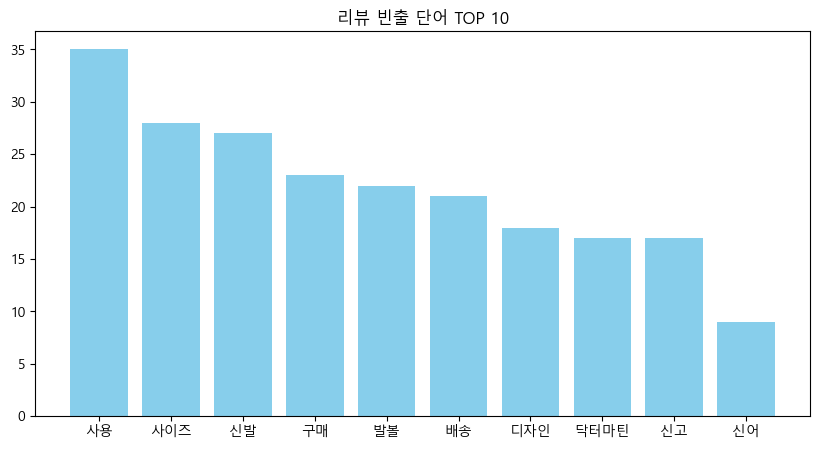

In [16]:
# 2. 빈출 단어 시각화 (막대 그래프)
#words_only = [x[0] for x in top_10]
#counts_only = [x[1] for x in top_10]

#plt.figure(figsize=(10, 5))
#plt.bar(words_only, counts_only, color='skyblue')
#plt.title('리뷰 빈출 단어 TOP 10')
#plt.show()

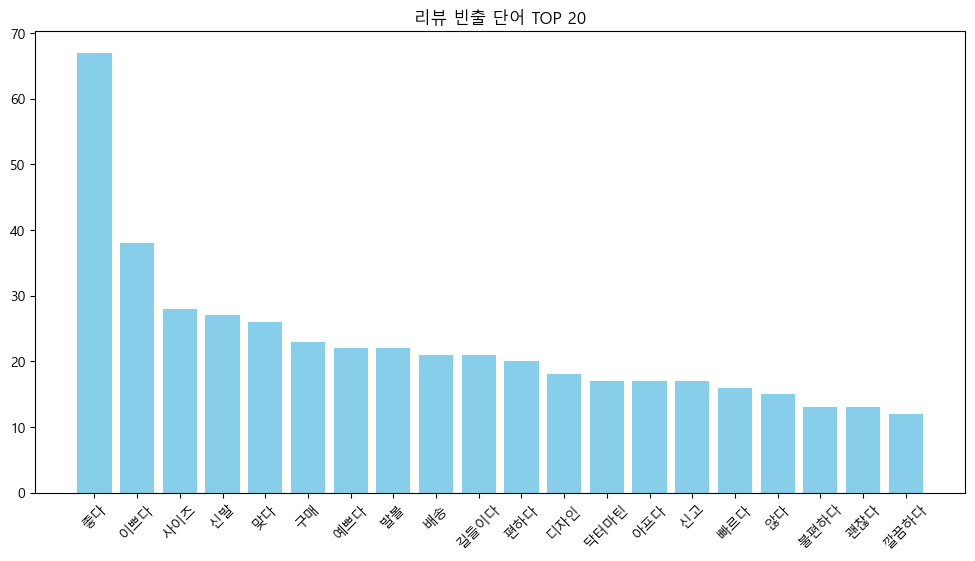

In [24]:
# TOP 20 단어와 빈도 분리
words_only = [x[0] for x in top_20]
counts_only = [x[1] for x in top_20]

plt.figure(figsize=(12, 6))
plt.bar(words_only, counts_only, color='skyblue')
plt.title('리뷰 빈출 단어 TOP 20')
plt.xticks(rotation=45)
plt.show()

### 2-2. 워드 클라우드

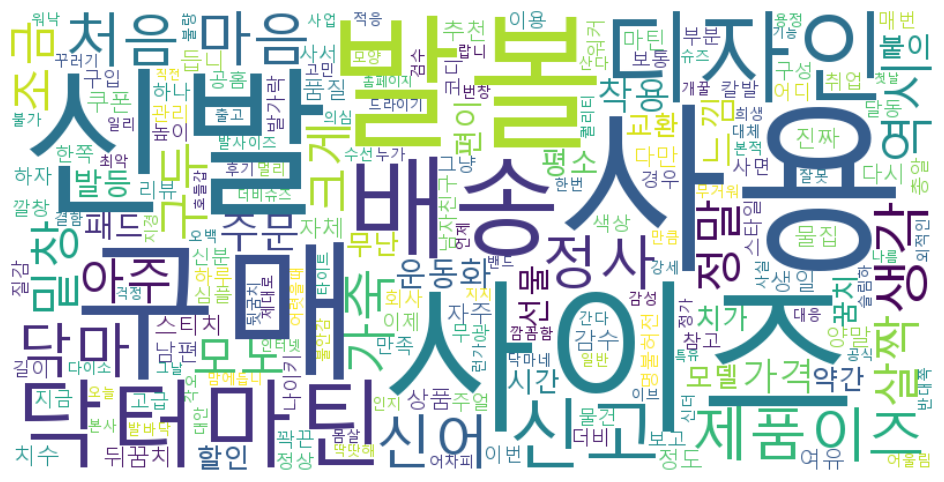

In [17]:
# 3. 워드 클라우드 생성
#wc = WordCloud(
    font_path='malgun', # 윈도우 폰트 이름
    background_color='white',
    width=800,
    height=400
#).generate_from_frequencies(count)

#plt.figure(figsize=(12, 6))
#plt.imshow(wc, interpolation='bilinear')
#plt.axis('off')
#plt.show()

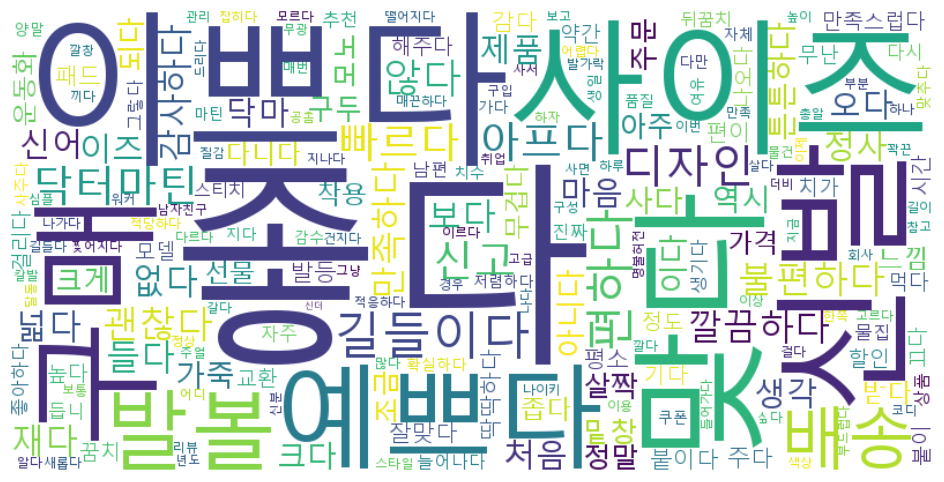

In [25]:
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 윈도우 기준
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(count)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

# 3. 제품 만족도 수치화 

### 3-1. 제품 만족도 수치화 - 단순 감성 사전 방식

In [ ]:
# 전문적인 모델 없이도, 긍정/부정 키워드가 포함된 문장 수를 계산하여 만족도를 점수화할 수 있습니다.

In [17]:
# 긍정/부정 단어 정의 (리뷰 데이터 기반)
pos_keywords = ['좋아요', '만족', '추천', '최고', '촉촉', '산뜻', '감사', '편해', '순해']
neg_keywords = ['아쉽', '실망', '불편', '부족', '비싼', '부실', '트러블', '깨져']

pos_score = 0
neg_score = 0

for review in reviews: # 이전 단계에서 만든 50개 리스트 활용
    for p in pos_keywords:
        if p in review:
            pos_score += 1
            break # 한 문장에 긍정어가 여러 개 있어도 1번만 카운트
    for n in neg_keywords:
        if n in review:
            neg_score += 1
            break

# 만족도 계산 (긍정 리뷰 비율)
satisfaction_rate = (pos_score / len(reviews)) * 100

print(f"----- 만족도 분석 결과 -----")
print(f"긍정 리뷰 추정: {pos_score}건")
print(f"부정 리뷰 추정: {neg_score}건")
print(f"최종 제품 만족도: {satisfaction_rate:.1f}%")

----- 만족도 분석 결과 -----
긍정 리뷰 추정: 8건
부정 리뷰 추정: 6건
최종 제품 만족도: 16.0%


### 3-2. 제품 만족도 수치화 - 가중치와 복합 의미 방식

In [12]:
# 정밀 감성 사전 (Sentiment Lexicon)
sentiment_dict = {
    # 긍정 (Positive)
    '최고': 2.0, '추천': 1.5, '만족': 1.5, '인생템': 2.0, '완벽': 2.0,
    '촉촉': 1.0, '산뜻': 1.0, '순해': 1.0, '흡수': 1.0, '진정': 1.0,
    '좋아요': 1.0, '좋네요': 1.0, '빠름': 0.8, '감사': 0.8, '무난': 0.3,
    
    # 부정 (Negative)
    '실망': -2.0, '최악': -2.5, '불량': -2.0, '고장': -2.0, '트러블': -2.0,
    '아쉽': -0.8, '비싸': -1.0, '불편': -1.2, '부족': -1.0, '부실': -1.2,
    '따가': -1.5, '끈적': -0.8, '무겁': -0.5, '밀려': -0.8, '답답': -1.0
}

# 부정 표현 (Inverter) - 긍정어의 의미

를 반전시킴
negators = ['안 ', '못 ', '전혀 ', '별로 ', '않고', '아니']

In [13]:
def calculate_sentiment_score(review_list, s_dict, n_list):
    total_score = 0
    review_results = []

    for review in review_list:
        score = 0
        # 1. 감성 사전 매칭
        for word, value in s_dict.items():
            if word in review:
                # 2. 부정 표현(Inverter) 체크: "안 좋아요" 등을 처리
                is_negated = False
                for neg in n_list:
                    if neg in review and review.find(neg) < review.find(word):
                        is_negated = True
                        break
                
                if is_negated:
                    score -= (value * 0.8)  # 긍정어 점수를 깎고 부정으로 반전
                else:
                    score += value
        
        # 문장별 최종 점수 기록 (0보다 크면 긍정, 작으면 부정)
        review_results.append(score)
        total_score += score

    # 3. 정규화 (0~100점 사이로 환산)
    # 단순 평균 점수를 기반으로 한 만족도 지수 산출
    avg_score = total_score / len(review_list)
    # -2.0~2.0 범위를 0~100으로 스케일링 (min-max normalization 유사)
    satisfaction_index = (avg_score + 2) / 4 * 100 
    
    return satisfaction_index, review_results

# 실행
score_index, results = calculate_sentiment_score(reviews, sentiment_dict, negators)

print(f"----- 정밀 분석 결과 -----")
print(f"분석 대상 리뷰: {len(reviews)}건")
print(f"평균 감성 점수: {sum(results)/len(results):.2f}")
print(f"최종 제품 만족도 지수: {score_index:.1f} / 100")

----- 정밀 분석 결과 -----
분석 대상 리뷰: 50건
평균 감성 점수: 0.15
최종 제품 만족도 지수: 53.8 / 100


# 4. 고급 텍스트 마이닝

### 속성별 분석 (Aspect-based Sentiment Analysis)

In [ ]:
# 리뷰 전체의 점수가 아니라 배송, 가격, 품질 등 특정 속성(Aspect)별로 점수를 따로 매기는 방식. 
# 키워드 매칭과 윈도우 슬라이싱(주변부 탐색) 기법을 사용

In [21]:
print(sentiment_dict)

{'최고': 2.0, '추천': 1.5, '만족': 1.5, '인생템': 2.0, '완벽': 2.0, '촉촉': 1.0, '산뜻': 1.0, '순해': 1.0, '흡수': 1.0, '진정': 1.0, '좋아요': 1.0, '좋네요': 1.0, '빠름': 0.8, '감사': 0.8, '무난': 0.3, '실망': -2.0, '최악': -2.5, '불량': -2.0, '고장': -2.0, '트러블': -2.0, '아쉽': -0.8, '비싸': -1.0, '불편': -1.2, '부족': -1.0, '부실': -1.2, '따가': -1.5, '끈적': -0.8, '무겁': -0.5, '밀려': -0.8, '답답': -1.0}


In [19]:
def aspect_sentiment_analysis(reviews, aspect_keywords, sentiment_dict):
    aspect_scores = []
    for review in reviews:
        # 1. 속성 키워드가 문장에 있는지 확인
        if any(keyword in review for keyword in aspect_keywords):
            score = 0
            # 2. 해당 문장 내의 감성 단어 점수만 합산
            for word, val in sentiment_dict.items():
                if word in review:
                    score += val
            aspect_scores.append(score)
    
    return np.mean(aspect_scores) if aspect_scores else 0

delivery_score = aspect_sentiment_analysis(reviews, ['배송', '택배', '배송비'], sentiment_dict)
effect_score = aspect_sentiment_analysis(reviews, ['촉촉', '수분', '흡수'], sentiment_dict)

print(f"배송 만족도: {delivery_score:.2f}")
print(f"효능 만족도: {effect_score:.2f}")

배송 만족도: 0.50
효능 만족도: 0.39


### 토픽 모델링 (LDA: Latent Dirichlet Allocation)

In [ ]:
# pip install scikit-learn pyldavis

In [ ]:
# 수많은 리뷰 속에 숨겨진 '주제(Topic)'들을 확률적으로 찾아내는 기법입니다. 
# 예를 들어 "이 리뷰 그룹은 '배송'에 대해 말하고 있고, 저 그룹은 '성분'에 대해 말하고 있다"는 것을 기계가 스스로 분류합니다.

In [23]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# 1. 문서-단어 행렬 생성
cv = CountVectorizer(max_df=0.95, min_df=2)
# 전처리된 nouns 리스트를 공백으로 합친 리스트가 필요함
review_docs = [" ".join(okt.nouns(r)) for r in reviews]
dtm = cv.fit_transform(review_docs)

# 2. LDA 모델 학습 (토픽 개수를 3개로 설정)
lda = LatentDirichletAllocation(n_components=3, random_state=42)
lda.fit(dtm)

# 3. 토픽별 주요 단어 출력
words = cv.get_feature_names_out()
for i, topic in enumerate(lda.components_):
    print(f"Topic #{i+1}:")
    print([words[index] for index in topic.argsort()[-5:]]) # 상위 5개 단어

Topic #1:
['생각', '조금', '배송', '아주', '쓰기']
Topic #2:
['자극', '제품', '성분', '사용', '피부']
Topic #3:
['피부', '효과', '느낌', '로션', '수분']


### 토픽 모델링 시각화

In [ ]:
# 1. 토픽별 상세 해석

# 토픽 번호	주요 키워드	                   해석 (Topic Labeling)	분석 결과의 의미
# Topic #1	배송, 아주, 조금, 쓰기, 생각	   구매 경험 및 편의성	   제품 자체의 성능보다는 배송 속도, 포장 상태, 전반적인 사용 편의성에 대한 사용자들의 경험이 뭉쳐 있는 토픽입니다. '조금', '아주' 같은 부사가 섞인 것으로 보아 만족/불만족의 정도가 표현된 문장들입니다.
# Topic #2	피부, 사용, 성분, 제품, 자극	   성분 안전성 및 적합성	   피부에 직접 닿는 제품인 만큼 민감도, 자극 유무, 성분 구성을 중요하게 생각하는 집단의 목소리입니다. "성분이 순해서 자극이 없다" 혹은 "특정 성분이 피부에 맞는다"는 맥락의 리뷰가 많았음을 시사합니다.
# Topic #3	수분, 로션, 느낌, 효과, 피부	   제품 효능 및 보습력	   이 제품의 본질인 '수분 충전'과 '사용 후 체감 효과'에 집중된 토픽입니다. 피부에 느껴지는 촉촉함이나 수분 지속력 등 효능에 대한 직접적인 피드백이 이 그룹에 속합니다.

In [ ]:
# 2. 분석 결과의 비즈니스 인사이트

# 이 해석을 바탕으로 다음과 같은 인사이트를 도출할 수 있습니다.
# 마케팅 포인트: 소비자들은 '성분(Topic 2)'과 '효능(Topic 3)'을 분리해서 인식하고 있습니다. 상세 페이지에서 "무자극 성분(2)"과 "강력한 수분 효과(3)"를 구분하여 강조하는 전략이 유효합니다.
# 개선점 발견: Topic #1에서 '조금', '생각' 등의 단어가 배송과 엮여 있다면, "생각보다 배송이 조금 느리다" 혹은 "생각보다 양이 조금 적다"와 같은 기대치 대비 아쉬움이 존재하는지 원문을 대조해 볼 필요가 있습니다.

### (참고) 토픽 모델링 시각화

In [ ]:
# pip install --upgrade pyLDAvis sklearn pandas

In [31]:
# # 설치: pip install pyldavis pyLDAvis.sklearn
# import pyLDAvis
# import pyLDAvis.sklearn

# # LDA 모델과 데이터를 시각화 도구에 연결
# panel = pyLDAvis.sklearn.prepare(lda, dtm, cv, mds='tsne')

# # 주피터 노트북 내에 출력하거나 HTML 파일로 저장
# pyLDAvis.display(panel)
# # pyLDAvis.save_html(panel, 'lda_vis.html')